In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import nltk.sentiment
import re
import numpy as np

import nltk
nltk.download('wordnet')

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os

import acquire
import prepare

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chasethompson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')

In [4]:
df = pd.read_csv('spam_clean.csv')

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### What are the most common words + phrases in our entire dataset, spam message, ham messages?

In [8]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [9]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 '150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cus

In [ ]:
pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [ ]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()


In [9]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        
        
# Driver code     
s = spam_words
h = ham_words

spam_str = listToString(s)
ham_str = listToString(h)

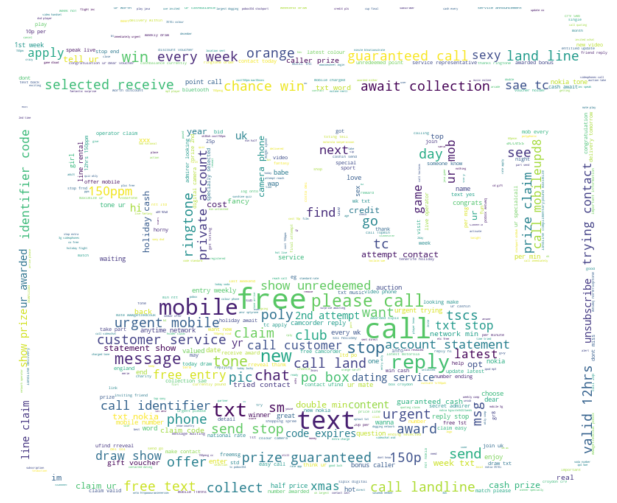

In [10]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = spam_str

# read the mask / color image taken from
spam_coloring = np.array(Image.open(path.join(d, "spam.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=spam_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)

# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(spam_coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

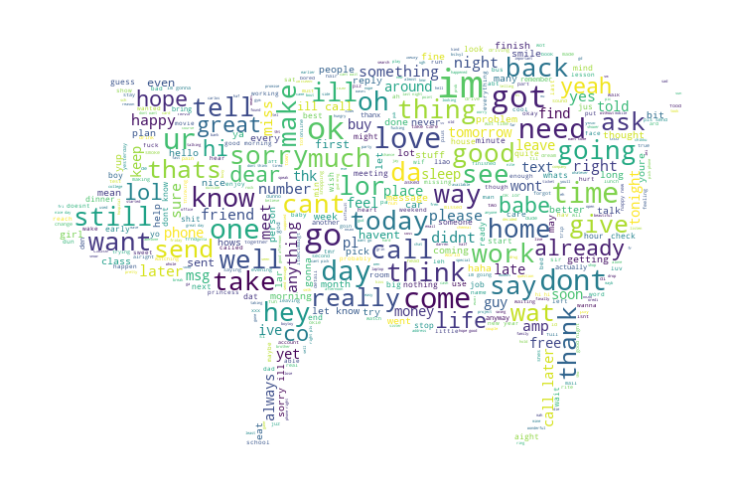

<Figure size 1152x648 with 0 Axes>

In [11]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = ham_str

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
ham_coloring = np.array(Image.open(path.join(d, "ham.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=ham_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(ham_coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [ ]:
plt.figure(figsize=(24, 14))
#plt.rcParams['axes.labelcolor'] = 'black'
df.label.value_counts().plot.pie(colors=["gold", "coral"], explode=(.05, .1), autopct="%.0f%%",fontsize=18)
plt.title("Ham vs Spam Distribution", fontsize=24)
plt.ylabel("")
plt.show()

In [ ]:
freq = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [ ]:
freq.sort_values(by="all").tail(25)

In [ ]:
freq.sort_values(by='all')['all'].tail(12).plot.barh(width=.6)
plt.title('The most common words', fontsize=24)
plt.show()

In [ ]:
freq.sort_values(by='spam')['spam'].tail(12).plot.barh(width=.6, color='orange')
plt.title('The most common words in spam messages', fontsize=24)
plt.show()

In [ ]:
freq.sort_values(by='ham')['ham'].tail(12).plot.barh(width=.6, color='plum')
plt.title('The most common words in ham messages', fontsize=24)
plt.show()

In [ ]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(width=.6)
plt.title('What are the most common bigrams in spam texts?')

In [ ]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width=.6)
plt.title('What are the most common bigrams in ham texts?')

In [ ]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width=.6)

In [ ]:
df = acquire.get_blog_articles(urls=acquire.get_all_urls(), cache=True)

In [14]:
def basic_clean(df, col):
    '''
    This function takes in a df and a string for a column and
    returns the df with a new column named 'basic_clean' with the
    passed column text normalized.
    '''
    df['basic_clean'] = df[col].str.lower()\
                    .replace(r'[^\w\s]', '', regex=True)\
                    .str.normalize('NFKC')\
                    .str.encode('ascii', 'ignore')\
                    .str.decode('utf-8', 'ignore')
    return df

def tokenize(df, col):
    '''
    This function takes in a df and a string for a column and
    returns a df with a new column named 'clean_tokes' with the
    passed column text tokenized and in a list.
    '''
    tokenizer = nltk.tokenize.ToktokTokenizer()
    df['clean_tokes'] = df[col].apply(tokenizer.tokenize)
    return df

def stem(df, col):
    '''
    This function takes in a df and a string for a column name and
    returns a df with a new column named 'stemmed'.
    '''
    # Create porter stemmer
    ps = nltk.porter.PorterStemmer()
    
    # Stem each token from our clean_tokes Series of lists
    stems = df[col].apply(lambda row: [ps.stem(word) for word in row])
    
    # Join our cleaned, stemmed lists of words back into sentences
    df['stemmed'] = stems.str.join(' ')
    
    return df

def lemmatize(df, col):
    '''
    This function takes in a df and a string for column name and
    returns the original df with a new column called 'lemmatized'.
    '''
    # Create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Lemmatize each token from our clean_tokes Series of lists
    lemmas = df[col].apply(lambda row: [wnl.lemmatize(word) for word in row])
    
    # Join the cleaned and lemmatized tokens back into sentences
    df['lemmatized'] = lemmas.str.join(' ')
    return df

from nltk.corpus import stopwords

def remove_stopwords(df, col):
    '''
    This function takes in a df and a string for column name and 
    returns the df with a new column named 'clean' with stopwords removed.
    '''
    # Create stopword_list
    stopword_list = stopwords.words('english')
    
    # Split words in column
    words = df[col].str.split()
    
    # Check each word in each row of the column against stopword_list and return only those that are not in list
    filtered_words = words.apply(lambda row: [word for word in row if word not in stopword_list])
    
    # Create new column of words that have stopwords removed
    df['clean_' + col] = filtered_words.str.join(' ')
    
    return df

In [15]:
df = basic_clean(df, 'content')

KeyError: 'content'

In [ ]:
df.head()

In [16]:
df = tokenize(df, 'basic_clean')

KeyError: 'basic_clean'

In [ ]:
df.head()

In [17]:
df = stem(df, 'clean_tokes')

KeyError: 'clean_tokes'

In [ ]:
df.head()

In [ ]:
df = remove_stopwords(df, 'stemmed')

In [18]:
df = lemmatize(df, 'clean_tokes')

KeyError: 'clean_tokes'

In [ ]:
df.head()

In [19]:
df = remove_stopwords(df, 'lemmatized')

KeyError: 'lemmatized'

In [ ]:
df.head()

In [13]:
lem_str = df.clean_lemmatized.sum()

AttributeError: 'DataFrame' object has no attribute 'clean_lemmatized'

In [ ]:
stem_str = df.clean_stemmed.sum()

In [ ]:
type(lem_str)

In [12]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = lem_str

# read the mask / color image taken from
codeup_coloring = np.array(Image.open(path.join(d, "codeup_logo.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=codeup_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)

# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(codeup_coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'lem_str' is not defined

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
i_want_to_hold_your_hand = '''Oh yeah, I'll tell you something
I think you'll understand
Then I'll say that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand

Oh please, say to me
You'll let me be your man
And please, say to me
You'll let me hold your hand
Now let me hold your hand
I wanna hold your hand

And when I touch you I feel happy
Inside
It's such a feeling that my love
I can't hide
I can't hide
I can't hide

Yeah, you got that something
I think you'll understand
Then I'll say that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand

And when I touch you I feel happy
Inside
It's such a feeling that my love
I can't hide
I can't hide
I can't hide

Yeah, you got that something
I think you'll understand
When I feel that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand'''

In [ ]:
i_want_to_hold_your_hand_sent = sia.polarity_scores(i_want_to_hold_your_hand)
i_want_to_hold_your_hand_compound = i_want_to_hold_your_hand_sent.get('compound')
i_want_to_hold_your_hand_compound

In [ ]:
long_and_winding_road = '''The long and winding road
That leads to your door
Will never disappear
I've seen that road before
It always leads me here
Lead me to you door
The wild and windy night
That the rain washed away
Has left a pool of tears
Crying for the day
Why leave me standing here?
Let me know the way
Many times I've been alone
And many times I've cried
Anyway you'll never know
The many ways I've tried
And still they lead me back
To the long winding road
You left me standing here
A long long time ago
Don't leave me waiting here
Lead me to your door
But still they lead me back
To the long winding road
You left me standing here
A long long time ago
Don't keep me waiting here
Lead me to your door
Yeah, yeah, yeah, yeah'''

In [ ]:
long_and_winding_road_sent = sia.polarity_scores(long_and_winding_road)

In [ ]:
love_me_do = '''Love, love me do
You know I love you
I'll always be true
So please, love me do
Whoa, love me do
Love, love me do
You know I love you
I'll always be true
So please, love me do
Whoa, love me do
Someone to love
Somebody new
Someone to love
Someone like you
Love, love me do
You know I love you
I'll always be true
So please, love me do
Whoa, love me do
Love, love me do
You know I love you
I'll always be true
So please, love me do
Whoa, love me do
Yeah, love me do
Whoa, oh, love me do'''

In [ ]:
love_me_do_sent = sia.polarity_scores(love_me_do)

love_me_do_sent = sia.polarity_scores(love_me_do)
love_me_do_compound = love_me_do_sent.get('compound')
love_me_do_compound

In [ ]:
from_me_to_you = '''Da da da, da da dumb dumb da
Da da da, da da dumb dumb da
If there's anything that you want
If there's anything I can do
Just call on me and I'll send it along
With love, from me to you
I've got everything that you want
Like a heart that's oh so true
Just call on me and I'll send it along
With love, from me to you
I've got arms that long to hold you
And keep you by my side
I've got lips that long to kiss you
And keep you satisfied (oh)
If there's anything that you want
If there's anything I can do
Just call on me and I'll send it along
With love, from me to you
From me
To you
Just call on me and I'll send it along
With love, from me to you
I've got arms that long to hold you
And keep you by my side
I've got lips that long to kiss you
And keep you satisfied (oh)
If there's anything that you want
If there's anything I can do
Just call on me and I'll send it along
With love, from me to you
To you
To you
To you'''

In [ ]:
from_me_to_you_sent = sia.polarity_scores(from_me_to_you)
from_me_to_you_compound = from_me_to_you_sent.get('compound')
from_me_to_you_compound

In [ ]:
she_loves_you = '''She loves you, yeah, yeah, yeah
She loves you, yeah, yeah, yeah
She loves you, yeah, yeah, yeah, yeah

You think you lost your love
Well, I saw her yesterday
It's you she's thinking of
And she told me what to say

She says she loves you
And you know that can't be bad
Yes, she loves you
And you know you should be glad

She said you hurt her so
She almost lost her mind
But now she says she knows
You're not the hurting kind

She says she loves you
And you know that can't be bad
Yes, she loves you
And you know you should be glad, ooh

She loves you, yeah, yeah, yeah
She loves you, yeah, yeah, yeah
And with a love like that
You know you should be glad

You know it's up to you
I think it's only fair
Pride can hurt you too
Apologize to her

Because she loves you
And you know that can't be bad
Yes, she loves you
And you know you should be glad, ooh

She loves you, yeah, yeah, yeah
She loves you, yeah, yeah, yeah
With a love like that
You know you should be glad
With a love like that
You know you should be glad
With a love like that
You know you should be glad
Yeah, yeah, yeah
Yeah, yeah, yeah, yeah'''

In [ ]:
she_loves_you_sent = sia.polarity_scores(she_loves_you)
she_loves_you_compound = she_loves_you_sent.get('compound')
she_loves_you_compound

In [ ]:
cant_buy_me_love = '''Can't buy me love, love
Can't buy me love
I'll buy you a diamond ring, my friend
If it makes you feel all right
I'll get you anything, my friend
If it makes you feel all right
'Cause I don't care too much for money
Money can't buy me love
I'll give you all I've got to give
If you say you love me, too
I may not have a lot to give
But what I've got I'll give to you
I don't care too much for money
Money can't buy me love
Can't buy me love
Everybody tells me so
Can't buy me love
No, no, no, no
Say you don't need no diamond rings
And I'll be satisfied
Tell me that you want the kind of things
That money just can't buy
I don't care too much for money
Money can't buy me love
Can't buy me love
Everybody tells me so
Can't buy me love
No, no, no, no
Say you don't need no diamond rings
And I'll be satisfied
Tell me that you want the kind of things
That money just can't buy
I don't care too much for money
Money can't buy me love
Can't buy me love, love
Can't buy me love, oh'''

In [ ]:
cant_buy_me_love_sent = sia.polarity_scores(cant_buy_me_love)
cant_buy_me_love_compound = cant_buy_me_love_sent.get('compound')
cant_buy_me_love_compound

In [ ]:
a_hard_days_night = '''It's been a hard day's night, and I've been working like a dog
It's been a hard day's night, I should be sleeping like a log
But when I get home to you I'll find the things that you do
Will make me feel alright
You know I work all day to get you money to buy you things
And it's worth it just to hear you say you're going to give me everything
So why on earth should I moan, 'cause when I get you alone
You know I feel ok
When I'm home everything seems to be right
When I'm home feeling you holding me tight, tight, yeah
It's been a hard day's night, and I've been working like a dog
It's been a hard day's night, I should be sleeping like a log
But when I get home to you I'll find the things that you do
Will make me feel alright, oww
So why on earth should I moan, 'cause when I get you alone
You know I feel ok
When I'm home everything seems to be right
When I'm home feeling you holding me tight, tight, yeah
Oh, it's been a hard day's night, and I've been working like a dog
It's been a hard day's night, I should be sleeping like a log
But when I get home to you I'll find the things that you do
Will make me feel alright
You know I feel alright
You know I feel alright'''

In [ ]:
a_hard_days_night_sent = sia.polarity_scores(a_hard_days_night)
a_hard_days_night_compound = a_hard_days_night_sent.get('compound')
a_hard_days_night_compound

In [ ]:
i_feel_fine = '''Baby's good to me, you know
She's happy as can be, you know
She said so
I'm in love with her and I feel fine
Baby says she's mine, you know
She tells me all the time, you know
She said so
I'm in love with her and I feel fine
I'm so glad that she's my little girl
She's so glad, she's telling all the world
That her baby buys her things, you know
He buys her diamond rings, you know
She said so
She's in love with me and I feel fine
Baby says she's mine, you know
She tells me all the time, you know
She said so
I'm in love with her and I feel fine
I'm so glad that she's my little girl
She's so glad, she's telling all the world
That her baby buys her things, you know
He buys her diamond rings, you know
She said so
She's in love with me and I feel fine
She's in love with me and I feel fine, mmm'''

In [ ]:
i_feel_fine_sent = sia.polarity_scores(i_feel_fine)
i_feel_fine_compound = i_feel_fine_sent.get('compound')
i_feel_fine_compound

In [ ]:
eight_days_a_week = '''Oh, I need your love, babe
Guess you know it's true
Hope you need my love babe
Just like I need you
Hold me, love me, hold me, love me
I ain't got nothing but love, babe
Eight days a week
Love you every day, girl
Always on my mind
One thing I can say, girl
Love you all the time
Hold me, love me, hold me, love me
I ain't got nothing but love, girl
Eight days a week
Eight days a week
I love you
Eight days a week
Is not enough to show I care
Ooh I need your love, babe
Guess you know it's true
Hope you need my love babe
Just like I need you
Hold me, love me, hold me, love me
I ain't got nothing but love, babe
Eight days a week
Eight days a week
I love you
Eight days a week
Is not enough to show I care
Love you every day, girl
Always on my mind
One thing I can say girl
Love you all the time
Hold me, love me, hold me, love me
I ain't got nothing but love, babe
Eight days a week
Eight days a week
Eight days a week'''

In [ ]:
eight_days_a_week_sent = sia.polarity_scores(eight_days_a_week)
eight_days_a_week_compound = eight_days_a_week_sent.get('compound')
eight_days_a_week_compound

In [ ]:
ticket_to_ride = '''I think I'm gonna be sad
I think it's today, yeah
The girl that's driving me mad
Is going away
She's got a ticket to ride
She's got a ticket to ride
She's got a ticket to ride
But she don't care
She said that living with me
Is bringing her down, yeah
For she would never be free
When I was around
She's got a ticket to ride
She's got a ticket to ride
She's got a ticket to ride
But she don't care
I don't know why she's riding so high
She ought to think twice
She ought to do right by me
Before she gets to saying goodbye
She ought to think twice
She ought to do right by me
I think I'm gonna be sad
I think it's today, yeah
The girl that's driving me mad
Is going away, yeah, oh
She's got a ticket to ride
She's got a ticket to ride
She's got a ticket to ride
But she don't care…'''

In [ ]:
she_loves_you_sent = sia.polarity_scores(she_loves_you)
she_loves_you_compound = she_loves_you_sent.get('compound')
she_loves_you_compound

In [ ]:
beatles = pd.DataFrame()

In [ ]:
beatles

In [ ]:
b = {'col1': [love_me_do, from_me_to_you, she_loves_you, i_want_to_hold_your_hand, cant_buy_me_love, a_hard_days_night, ], 'col2': [3, 4]}

In [ ]:
b = {'song': ['Love Me Do', 'From Me To You', 'She Loves You', 'I Want To Hold Your Hand', "Can't Buy Me Love", "A Hard Day's Night", 'I Feel Fine', 'Eight Days A Week' ], 'sentiment': [love_me_do_compound, from_me_to_you_compound, she_loves_you_compound, i_want_to_hold_your_hand_compound, cant_buy_me_love_compound, a_hard_days_night_compound, i_feel_fine_compound, eight_days_a_week_compound]}

In [ ]:
b

In [ ]:
df = pd.DataFrame(data=b)

In [ ]:
df.plot()

Trying something out for the 'I have a dream speech'

In [ ]:
# Read the input
inputFile = values[0]
wordFilePath = os.path.dirname(inputFile) + "\\"
textFields = values[1].split(',')
stopWordLanguage = values[4]
numberOfWords = int(values[2])
numberOfSections = int(values[3])

# Valid stop word language?
if not(stopWordLanguage in stopWordLanguageList):
     sys.exit("Invalid stop word language. Exiting program.")   

# Check to make sure the input file exists:
if not(os.path.exists(inputFile)):
    sys.exit("Input file does not exits. Exiting the program.")

# Delete any previously written files.
outFile = wordFilePath + "Words.csv"
if os.path.exists(outFile):
    os.remove(outFile) 

outFile = wordFilePath + "NGrams.csv"
if os.path.exists(outFile):
    os.remove(outFile) 

# Get list of stop words (will be used later)
stopwords = set(stopwords.words(stopWordLanguage)) 

stemmer = SnowballStemmer(stopWordLanguage) 

recordCounter = 0

# Open the input csv file. Loop through each record and process each field (textFields)
csv.field_size_limit(sys.maxsize)
with open(inputFile, mode='r') as csvFile:
    csvReader = csv.DictReader(csvFile)
    lineCount = 0
    for csvRow in csvReader:
        recordID = csvRow["Record ID"]

        # Process each text field.
        for textItem in textFields:
            text = csvRow[textItem]

            recordCounter = recordCounter + 1
            
            # Text cleanup
            text = text.replace('\n', ' ') 
            text = " " + text.lower() 
            text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text) # Replace all none alphanumeric characters with spaces

            # Break into single words
            tokens = [token for token in text.split(" ") if token != ""]
            output = list(ngrams(tokens, 1))

            sectionWordCount = math.ceil(len(output)/numberOfSections)

            # Create the sentiment analyzer for some basic sentiment tests.
            nltkSentiment = SentimentIntensityAnalyzer()

            # Write single words to csv
            outFile = wordFilePath + "Words.csv"

            with open(outFile,'a', newline='') as out:
                csvOut = csv.writer(out)

                # Write the heading
                if recordCounter == 1:
                    heading = ('Field','Record ID','Word','Stem','Stop Word','Sentiment','Word Number','Section','Section Word Number')
                    csvOut.writerow(heading)

                wordNumber = 1
                wordNumberInSection = 1
                section = 1

                # Write each word
                for row in output:
                    word = ''.join(row) #  Convert the tuple to a string

                    # Get the word's stem.
                    wordStem = stemmer.stem(word)

                    # Get the word's sentiment score.
                    score = nltkSentiment.polarity_scores(word)
                    compoundScore = score['compound']

                    if word in stopwords:
                        isStopWord = True
                    else:
                        isStopWord = False

                    row = (str(textItem),) + (str(recordID),) + row + (wordStem,) + (str(isStopWord),) + (str(compoundScore),) + (str(wordNumber),) + (str(section),) + (str(wordNumberInSection),)
                    csvOut.writerow(row)

                    # Update counter and section.
                    if wordNumberInSection % sectionWordCount == 0:
                        section = section + 1
                        wordNumberInSection = 1
                    else:
                        wordNumberInSection = wordNumberInSection + 1

                    wordNumber = wordNumber + 1

            # Parse into n-grams
            tokens = [token for token in text.split(" ") if token != ""]
            output = list(ngrams(tokens, numberOfWords))

            # Write n-grams to csv
            outFile = wordFilePath + "NGrams.csv"

            with open(outFile,'a', newline='') as out:
                csvOut = csv.writer(out)

                # Write the heading
                if recordCounter == 1:
                    heading = ('Field','Record ID','Word1',)
                    for i in range(2, numberOfWords+1):
                        heading = heading + ('Word' + str(i),)
                    
                    heading = heading + ('Full N-Gram','N-Gram Sentiment','N-Gram Number','Section','Section N-Gram Number')
                    csvOut.writerow(heading)

                wordNumber = 1
                wordNumberInSection = 1
                section = 1

                # Write each n-gram
                fullLine = ''
                for row in output:
                    fullLine = ' '.join(row) # Build the full string with spaces
                    
                    # Get the n-gram's sentiment score.
                    score = nltkSentiment.polarity_scores(fullLine)
                    compoundScore = score['compound']

                    row = (str(textItem),) + (str(recordID),) + row + (fullLine,) + (str(compoundScore),) + (str(wordNumber),) + (str(section),) + (str(wordNumberInSection),)
                    csvOut.writerow(row)

                    # Update counter and section.
                    if wordNumberInSection % sectionWordCount == 0:
                        section = section + 1
                        wordNumberInSection = 1
                    else:
                        wordNumberInSection = wordNumberInSection + 1

                    wordNumber = wordNumber + 1

        lineCount += 1

In [ ]:
df = pd.read_csv('Input File.csv')

In [ ]:
df